In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from underthesea import text_normalize, word_tokenize
import unicodedata
from sklearn.preprocessing import MultiLabelBinarizer


Filtered dataset loading

In [ ]:
md = pd.read_csv('/content/drive/MyDrive/NLP/filtered_dataset.csv')
md.head()

,description,filtered_category
0,"- Trong một âm mưu đã được sắp đặt sẵn, tay đu...","action, sci-fi, thriller"
1,Hai đối thủ cạnh tranh buộc phải đối mặt khi c...,"crime, thriller"
2,Chín cặp người thường được đưa vào một cuộc ph...,adventure
3,Bộ phim kể về một nữ chính 20 tuổi được biết...,"psychological, romance"
4,10 Minutes Gone là một bộ phim kinh dị hành độ...,"action, crime, mystery, thriller"


In [ ]:
# Split the category column by commas and strip whitespace
md['filtered_category'] = md['filtered_category'].apply(lambda x: [cat.strip() for cat in x.split(',')])




Encoding category

In [ ]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

y = mlb.fit_transform(md['filtered_category'])

y_encoded = pd.DataFrame(y, columns=mlb.classes_)

print(y_encoded.head())


   action  adventure  animation  comedy  crime  family  fantasy  horror  \
0       1          0          0       0      0       0        0       0   
1       0          0          0       0      1       0        0       0   
2       0          1          0       0      0       0        0       0   
3       0          0          0       0      0       0        0       0   
4       1          0          0       0      1       0        0       0   

   mystery  psychological  romance  sci-fi  thriller  
0        0              0        0       1         1  
1        0              0        0       0         1  
2        0              0        0       0         0  
3        0              1        1       0         0  
4        1              0        0       0         1  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
md_encoded = pd.concat([md['description'], y_encoded], axis=1)

print(md_encoded.head())


                                         description  action  adventure  \
0  - Trong một âm mưu đã được sắp đặt sẵn, tay đu...       1          0   
1  Hai đối thủ cạnh tranh buộc phải đối mặt khi c...       0          0   
2  Chín cặp người thường được đưa vào một cuộc ph...       0          1   
3  Bộ phim   kể về một nữ chính 20 tuổi được biết...       0          0   
4  10 Minutes Gone là một bộ phim kinh dị hành độ...       1          0   

   animation  comedy  crime  family  fantasy  horror  mystery  psychological  \
0          0       0      0       0        0       0        0              0   
1          0       0      1       0        0       0        0              0   
2          0       0      0       0        0       0        0              0   
3          0       0      0       0        0       0        0              1   
4          0       0      1       0        0       0        1              0   

   romance  sci-fi  thriller  
0        0       1         1  
1     

In [ ]:
# Save to a new CSV file
md_encoded.to_csv("movies_encoded_filtered.csv", index=False)


Preprocessing:

In [ ]:
import unicodedata

def unicode_normalize(text):
    return unicodedata.normalize('NFC', text)

md_encoded['description'] = md_encoded['description'].apply(unicode_normalize)

md_encoded.head()


,description,action,adventure,animation,comedy,crime,family,fantasy,horror,mystery,psychological,romance,sci-fi,thriller
0,"- Trong một âm mưu đã được sắp đặt sẵn, tay đu...",1,0,0,0,0,0,0,0,0,0,0,1,1
1,Hai đối thủ cạnh tranh buộc phải đối mặt khi c...,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Chín cặp người thường được đưa vào một cuộc ph...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bộ phim kể về một nữ chính 20 tuổi được biết...,0,0,0,0,0,0,0,0,0,1,1,0,0
4,10 Minutes Gone là một bộ phim kinh dị hành độ...,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
def clean_text(text):
    pattern = r'[^a-zA-Z\sÀ-ỹ]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

md_encoded['description'] = md_encoded['description'].apply(clean_text)

md_encoded.head()

,description,action,adventure,animation,comedy,crime,family,fantasy,horror,mystery,psychological,romance,sci-fi,thriller
0,Trong một âm mưu đã được sắp đặt sẵn tay đua ...,1,0,0,0,0,0,0,0,0,0,0,1,1
1,Hai đối thủ cạnh tranh buộc phải đối mặt khi c...,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Chín cặp người thường được đưa vào một cuộc ph...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bộ phim kể về một nữ chính tuổi được biết c...,0,0,0,0,0,0,0,0,0,1,1,0,0
4,Minutes Gone là một bộ phim kinh dị hành động...,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
def spelling_normalize(text):
    text = text.replace('kĩ','kỹ').replace('mỳ', 'mì').replace('sỹ', 'sĩ').replace('lí ',' lý ')

    return text

md_encoded['description'] = md_encoded['description'].apply(spelling_normalize).apply(text_normalize)

md_encoded.head()

,description,action,adventure,animation,comedy,crime,family,fantasy,horror,mystery,psychological,romance,sci-fi,thriller
0,Trong một âm mưu đã được sắp đặt sẵn tay đua x...,1,0,0,0,0,0,0,0,0,0,0,1,1
1,Hai đối thủ cạnh tranh buộc phải đối mặt khi c...,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Chín cặp người thường được đưa vào một cuộc ph...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bộ phim kể về một nữ chính tuổi được biết cô c...,0,0,0,0,0,0,0,0,0,1,1,0,0
4,Minutes Gone là một bộ phim kinh dị hành động ...,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
tkn_md = md_encoded.copy()

tkn_md['description'] = tkn_md['description'].apply(lambda sentence: word_tokenize(sentence, format='text'))

tkn_md.head()

,description,action,adventure,animation,comedy,crime,family,fantasy,horror,mystery,psychological,romance,sci-fi,thriller
0,Trong một âm_mưu đã được sắp_đặt sẵn tay đua x...,1,0,0,0,0,0,0,0,0,0,0,1,1
1,Hai đối_thủ cạnh_tranh buộc phải đối_mặt khi c...,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Chín_cặp người thường được đưa vào một cuộc ph...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bộ phim kể về một nữ chính tuổi được biết cô c...,0,0,0,0,0,0,0,0,0,1,1,0,0
4,Minutes Gone là một bộ phim kinh_dị hành_động ...,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
tkn_md['description'] = tkn_md['description'].str.lower()

tkn_md.head()

,description,action,adventure,animation,comedy,crime,family,fantasy,horror,mystery,psychological,romance,sci-fi,thriller
0,trong một âm_mưu đã được sắp_đặt sẵn tay đua x...,1,0,0,0,0,0,0,0,0,0,0,1,1
1,hai đối_thủ cạnh_tranh buộc phải đối_mặt khi c...,0,0,0,0,1,0,0,0,0,0,0,0,1
2,chín_cặp người thường được đưa vào một cuộc ph...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,bộ phim kể về một nữ chính tuổi được biết cô c...,0,0,0,0,0,0,0,0,0,1,1,0,0
4,minutes gone là một bộ phim kinh_dị hành_động ...,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
tkn_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   description    9008 non-null   object
 1   action         9008 non-null   int64 
 2   adventure      9008 non-null   int64 
 3   animation      9008 non-null   int64 
 4   comedy         9008 non-null   int64 
 5   crime          9008 non-null   int64 
 6   family         9008 non-null   int64 
 7   fantasy        9008 non-null   int64 
 8   horror         9008 non-null   int64 
 9   mystery        9008 non-null   int64 
 10  psychological  9008 non-null   int64 
 11  romance        9008 non-null   int64 
 12  sci-fi         9008 non-null   int64 
 13  thriller       9008 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 985.4+ KB


In [ ]:
with open('/content/drive/MyDrive/NLP/stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.readlines()
stopwords = [word.replace('\n', '') for word in stopwords]
print(stopwords)

['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'hơn', 'ít', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhất', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'ở', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trong', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'về', 'vì', 'việc', 'với', 'vừa']


In [ ]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

tkn_md['description'] = tkn_md['description'].apply(remove_stopwords)
tkn_md.head()

,description,action,adventure,animation,comedy,crime,family,fantasy,horror,mystery,psychological,romance,sci-fi,thriller
0,âm_mưu sắp_đặt sẵn tay đua xe lần giành chức v...,1,0,0,0,0,0,0,0,0,0,0,1,1
1,hai đối_thủ cạnh_tranh buộc đối_mặt gọi đến gi...,0,0,0,0,1,0,0,0,0,0,0,0,1
2,chín_cặp người thường đưa cuộc phiêu_lưu toàn_...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,bộ phim kể nữ chính tuổi biết cô còn sống năm ...,0,0,0,0,0,0,0,0,0,1,1,0,0
4,minutes gone bộ phim kinh_dị hành_động căng_th...,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
tkn_md.to_csv("processed_data.csv", index=False)


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
X = tkn_md["description"]
y = np.asarray(tkn_md[tkn_md.columns[1:]])


# Fit the TfidfVectorizer
vectorizar = TfidfVectorizer(max_features=3000, max_df=0.85)
X_transformed = vectorizar.fit_transform(X)

# Save the fitted TfidfVectorizer to a file
joblib.dump(vectorizar, 'vectorizer.pkl')



['vectorizer.pkl']

In [ ]:
y[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

Split the data

In [ ]:
!pip install scikit-multilearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Test Naive Bayes


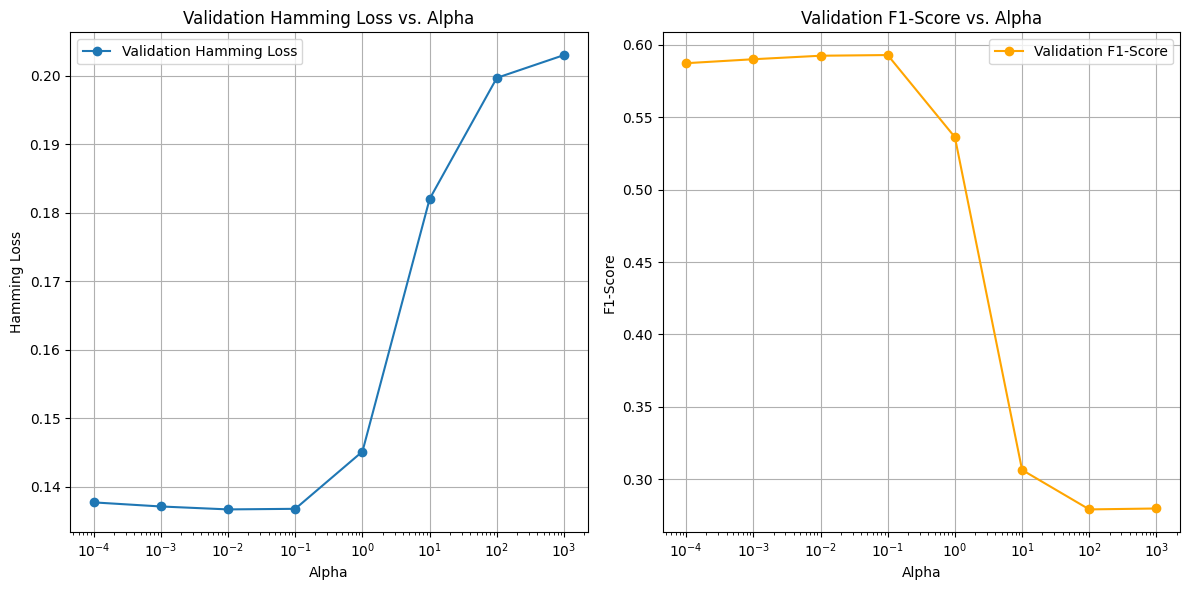

In [ ]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss
import matplotlib.pyplot as plt
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
validation_hamming_losses = []
validation_f1_scores = []

for alpha in alpha_values:
    clf3 = MultinomialNB(alpha=alpha, fit_prior=True)
    clf = MultiOutputClassifier(clf3, n_jobs=-1)

    clf.fit(X_train, y_train)

    y_val_pred = clf.predict(X_val)

    validation_hamming_losses.append(hamming_loss(y_val, y_val_pred))

    f1 = f1_score(y_val, y_val_pred, average='micro')
    validation_f1_scores.append(f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogx(alpha_values, validation_hamming_losses, marker='o', label='Validation Hamming Loss')
plt.xlabel('Alpha')
plt.ylabel('Hamming Loss')
plt.title('Validation Hamming Loss vs. Alpha')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(alpha_values, validation_f1_scores, marker='o', label='Validation F1-Score', color='orange')
plt.xlabel('Alpha')
plt.ylabel('F1-Score')
plt.title('Validation F1-Score vs. Alpha')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Test Knn

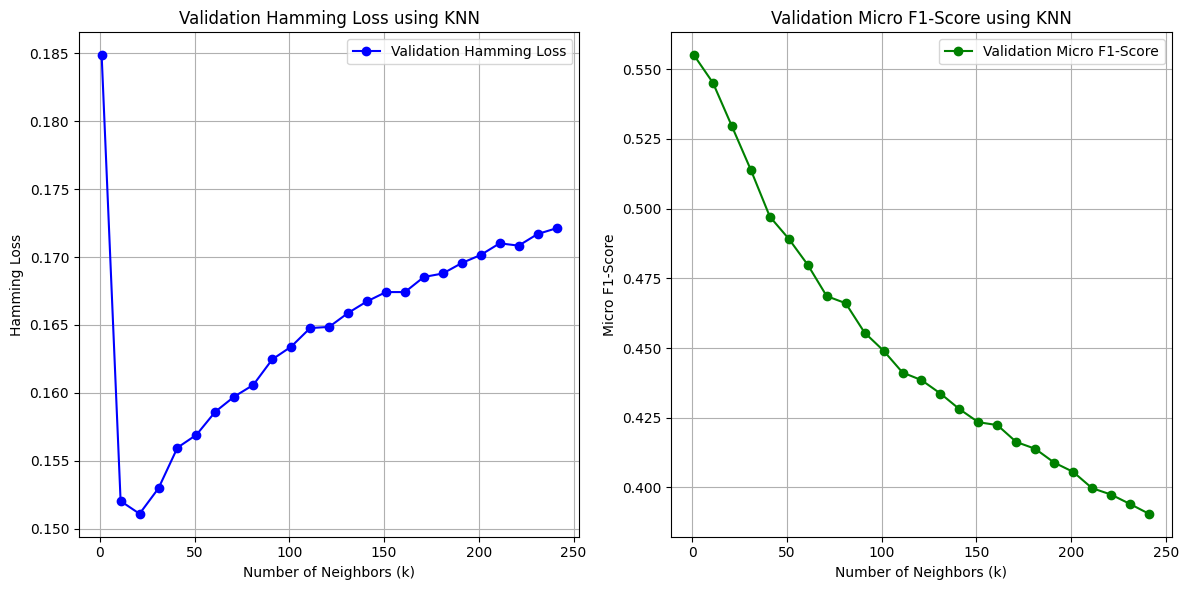

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, f1_score
import matplotlib.pyplot as plt

k_values = range(1, 250, 10)
validation_hamming_losses = []
validation_f1_micro_scores = []

for k in k_values:
    clf2 = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    clf = MultiOutputClassifier(clf2, n_jobs=-1)

    clf.fit(X_train, y_train)

    y_val_pred = clf.predict(X_val)

    validation_hamming_losses.append(hamming_loss(y_val, y_val_pred))

    validation_f1_micro_scores.append(f1_score(y_val, y_val_pred, average='micro'))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, validation_hamming_losses, marker='o', label='Validation Hamming Loss', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Hamming Loss')
plt.title('Validation Hamming Loss using KNN')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, validation_f1_micro_scores, marker='o', label='Validation Micro F1-Score', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Micro F1-Score')
plt.title('Validation Micro F1-Score using KNN')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Test random forest

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


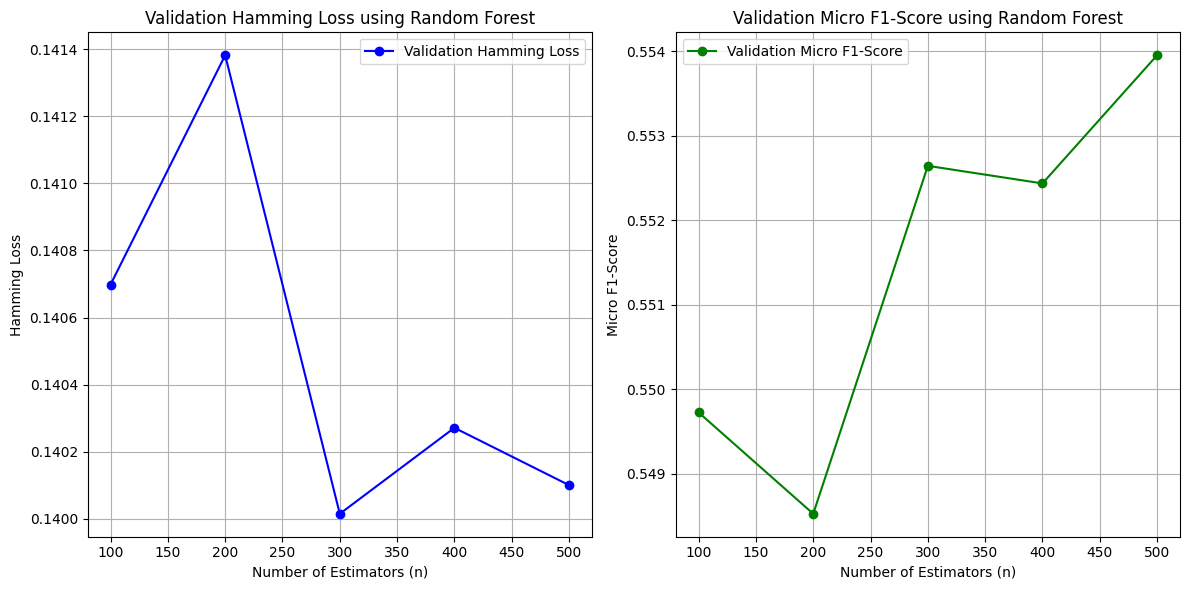

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, f1_score
import matplotlib.pyplot as plt

n_values = range(100, 501, 100)
validation_hamming_losses = []
validation_f1_micro_scores = []

for n in n_values:
    clf1 = RandomForestClassifier(n_estimators=n, n_jobs=-1, random_state=42)
    clf = MultiOutputClassifier(clf1, n_jobs=-1)

    clf.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred = clf.predict(X_val)

    validation_hamming_losses.append(hamming_loss(y_val, y_val_pred))

    validation_f1_micro_scores.append(f1_score(y_val, y_val_pred, average='micro'))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, validation_hamming_losses, marker='o', label='Validation Hamming Loss', color='blue')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('Hamming Loss')
plt.title('Validation Hamming Loss using Random Forest')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_values, validation_f1_micro_scores, marker='o', label='Validation Micro F1-Score', color='green')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('Micro F1-Score')
plt.title('Validation Micro F1-Score using Random Forest')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Applying models with optimizing parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import hamming_loss
import joblib

# models with optimizing parameters:
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
nb = MultinomialNB(alpha=0.1)

multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)
multi_target_knn = MultiOutputClassifier(knn, n_jobs=-1)
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)

# Train Models
multi_target_rf.fit(X_train, y_train)
multi_target_knn.fit(X_train, y_train)
multi_target_nb.fit(X_train, y_train)

joblib.dump(multi_target_rf, "multi_target_rf_model.joblib")
joblib.dump(multi_target_knn, "multi_target_knn_model.joblib")
joblib.dump(multi_target_nb, "multi_target_nb_model.joblib")

print("Models saved successfully!")


Models saved successfully!


In [ ]:
!pip install underthesea

In [ ]:
import joblib
from underthesea import text_normalize, word_tokenize
import unicodedata
import numpy as np
import pandas as pd

In [ ]:

with open('/content/drive/MyDrive/NLP/stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.readlines()
stopwords = [word.replace('\n', '') for word in stopwords]


def clean_text(text):
    pattern = r'[^a-zA-Z\sÀ-ỹ]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

def pre_process(sentence):
    sentence = unicodedata.normalize('NFC', sentence)
    sentence = clean_text(sentence)
    sentence = sentence.replace('kĩ','kỹ').replace('mỳ', 'mì').replace('sỹ', 'sĩ').replace('lí ',' lý ')
    sentence = text_normalize(sentence)
    sentence = word_tokenize(sentence, format='text')
    sentence = sentence.lower()
    sentence = remove_stopwords(sentence)

    return [sentence]




In [ ]:

label_names = [
    'action', 'adventure', 'animation', 'comedy', 'crime', 'family',
    'fantasy', 'horror', 'mystery', 'psychological', 'romance', 'sci-fi',
    'thriller'
]

Practical running

In [ ]:

vectorizer = joblib.load('/content/vectorizer.pkl')
clf_joblib = joblib.load('/content/drive/MyDrive/NLP/models/multi_target_nb_model.joblib')
new_sentences = input("Enter the movie description: ")

new_sentence_preprocessed = pre_process(new_sentences)
new_sentence_tfidf = vectorizer.transform(new_sentence_preprocessed)

# predict the labels using the trained model
predicted_sentences = clf_joblib.predict(new_sentence_tfidf)

predicted_labels = []
for row in predicted_sentences:
    labels = [label_names[i] for i, val in enumerate(row) if val == 1]
    predicted_labels.append(labels)

print("Predicted multi-hot encoding:", predicted_sentences)
print("Predicted labels:", predicted_labels)


Enter the movie description: Khi Trái Đất bị tấn công bởi một chủng loài ngoài hành tinh với công nghệ tiên tiến, một nhóm nhà khoa học và chiến binh phải hợp sức để cứu nhân loại. Họ khám phá ra một bí mật khủng khiếp về nguồn gốc của kẻ thù
Predicted multi-hot encoding: [[1 1 0 0 0 0 0 0 0 0 0 1 0]]
Predicted labels: [['action', 'adventure', 'sci-fi']]
